In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import pandas as pd
import geopandas as gpd
import mscthesis
import plotly.graph_objects as pgo
import plotly.express as px
import validation
import plots

In [15]:
visits = pd.read_csv('./../../dbs/sweden/visits-song.csv').set_index('userid')
home_locations = pd.read_csv('./../../dbs/sweden/homelocations.csv').set_index('userid')
home_locations = gpd.GeoDataFrame(
    home_locations,
    crs="EPSG:3006",
    geometry=gpd.points_from_xy(home_locations.x, home_locations.y),
)

In [14]:
sampers = validation.Sampers()
sampers.prepare()

Preparing scale national
Reading original data...
zones (682, 2)
odm (595984,) 221892.04955949992
Reindexing...
odm (465124,)
Calculating distances between zones...
distances (465124,)

Preparing scale east
Reading original data...
zones (3038, 5)
odm (9253764,) 4982573.000714299
Reindexing...
odm (9229444,)
Calculating distances between zones...
distances (9229444,)

Preparing scale west
Reading original data...
zones (2964, 5)
odm (8791225,) 3339597.621275899
Reindexing...
odm (8785296,)
Calculating distances between zones...
distances (8785296,)



In [17]:
converted_visits = sampers.convert(visits)

Converting visits to GeoDataFrame...
Converting CRS...


In [18]:
scale = "national"

In [19]:
sparse_odm = sampers.align(scale, converted_visits, home_locations)

Not bboxing national
Aligning region-visits to Sampers zones...
removed 154224 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
removed 12185 point-visits due to missing zone geom
1759991 visits left after alignment
Creating ODM...


In [101]:
sparse_odm = sampers.distance_cut(scale, sparse_odm)

In [102]:
gm = validation.GravityModel(beta=0.03)

In [103]:
dense_odm = gm.gravitate(sparse_odm, sampers.distances[scale])

IPF converged after 30 iterations


In [104]:
dense_odm = sampers.distance_cut(scale, dense_odm)

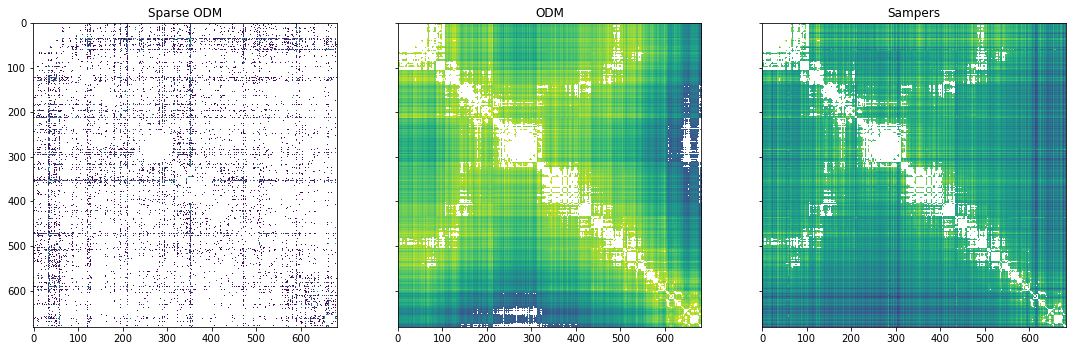

In [105]:
_ = plots.plot_odms(sparse_odm, dense_odm, sampers.odm[scale])

In [106]:
score = mscthesis.spssim(sampers.odm[scale], dense_odm, sampers.distances[scale], nquantiles=100)

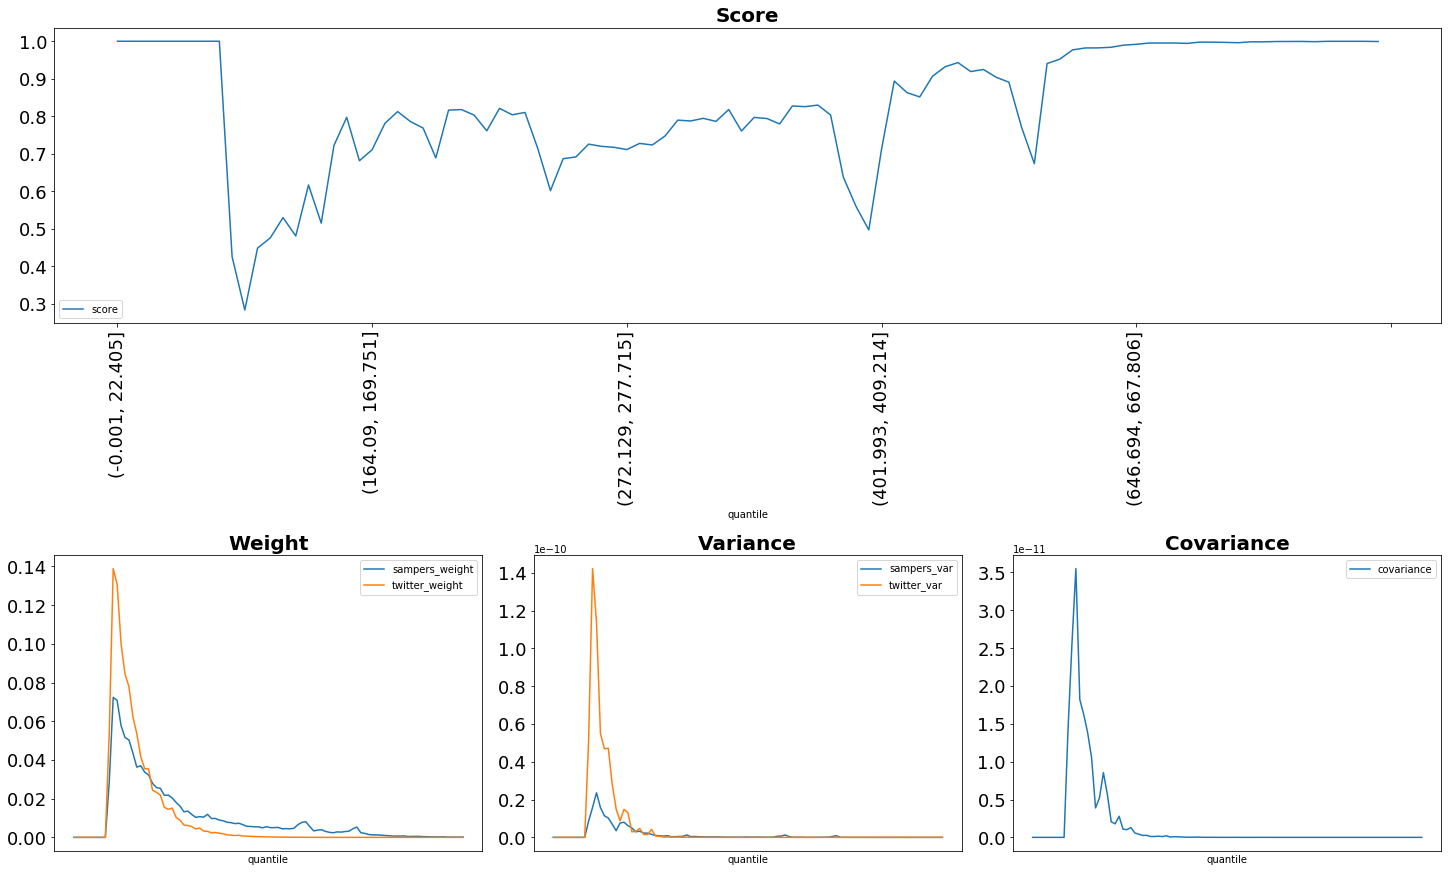

In [107]:
_ = plots.plot_spssim_score(score)

In [108]:
(score.score * score.twitter_weight).sum()

0.5411859607779761

In [109]:
(score.score * score.sampers_weight).sum()

0.637982733926823